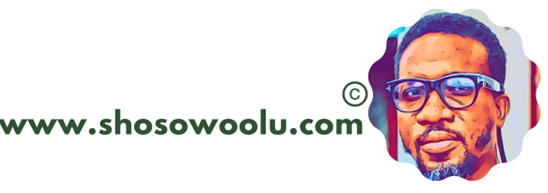


# Prediction of Success of Start-Ups Using Unbiased Classification Models

**Notebook 1: Exploratory Data Analysis and Data Cleaning**

**Purpose:** This notebook would be used to carry out the exploratory data analysis (EDA) of the datasets.
-v2 notes: updated to streamline the cleaning steps from v1 and arrange table actions alphabetically. Only necessary tables from the database needed for the creation of the final dataset required to build the model  are loaded.



In [1]:
# Import python libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly

from datetime import date
import re

## Clean each dataset seperately

In [2]:
# To speed up the cleaning process test dataset size loaded is controlled
data_test_size = 5000

### Acquisitions Dataset

In [3]:
# Load and peep at the dataset info again
acquisitions=pd.read_csv('data//acquisitions.csv', nrows=data_test_size)
acquisitions.head(2)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,acquiree_uuid,acquiree_name,...,acquirer_cb_url,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquisition_type,acquired_on,price_usd,price,price_currency_code
0,c62807f2-3487-f63b-e7fc-559b752ed44c,Flektor acquired by Fox Interactive Media,acquisition,fox-interactive-media-acquires-flektor--c62807f2,https://www.crunchbase.com/acquisition/fox-int...,97111,2007-05-31 22:19:54,2018-02-13 00:09:05,180ebf67-68d0-2316-e93d-8e1e546330ba,Flektor,...,https://www.crunchbase.com/organization/fox-in...,USA,CA,California,Beverly Hills,NaN,2007-05-30,NaN,NaN,NaN
1,419cabe1-4d71-5f64-3e9b-c9d0fb445cca,GrandCentral acquired by Google,acquisition,google-acquires-grandcentral--419cabe1,https://www.crunchbase.com/acquisition/google-...,40447,2007-07-03 08:14:50,2018-02-12 22:14:26,5b05e013-a448-3a0b-d872-a6ae668e1192,GrandCentral,...,https://www.crunchbase.com/organization/google,USA,CA,California,Mountain View,NaN,2007-07-01,60000000.0,60000000.0,USD


In [4]:
acquisitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   5000 non-null   object 
 1   name                   5000 non-null   object 
 2   type                   5000 non-null   object 
 3   permalink              5000 non-null   object 
 4   cb_url                 5000 non-null   object 
 5   rank                   5000 non-null   int64  
 6   created_at             5000 non-null   object 
 7   updated_at             5000 non-null   object 
 8   acquiree_uuid          5000 non-null   object 
 9   acquiree_name          5000 non-null   object 
 10  acquiree_cb_url        5000 non-null   object 
 11  acquiree_country_code  4362 non-null   object 
 12  acquiree_state_code    3506 non-null   object 
 13  acquiree_region        4383 non-null   object 
 14  acquiree_city          4383 non-null   object 
 15  acqu

In [5]:
# List the columns for ease of identifying the ones to drop
acquisitions.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'acquiree_uuid', 'acquiree_name', 'acquiree_cb_url',
       'acquiree_country_code', 'acquiree_state_code', 'acquiree_region',
       'acquiree_city', 'acquirer_uuid', 'acquirer_name', 'acquirer_cb_url',
       'acquirer_country_code', 'acquirer_state_code', 'acquirer_region',
       'acquirer_city', 'acquisition_type', 'acquired_on', 'price_usd',
       'price', 'price_currency_code'],
      dtype='object')

In [6]:
# Remove the unneeded columns
acquisitions.drop([ 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'acquiree_cb_url','acquirer_cb_url', 'uuid', 'name', 'type', 'acquiree_name',
       'acquiree_country_code', 'acquiree_state_code', 'acquiree_region',
       'acquiree_city','acquirer_country_code', 'acquirer_state_code', 'acquirer_region',
       'acquirer_city', 'acquisition_type','price', 'price_currency_code'],axis=1,inplace=True)

In [7]:
# Rename the acquiree_uuid
acquisitions.rename(columns={'acquiree_uuid':'org_uuid'},inplace=True)

In [8]:
# Check the missing values
acquisitions.isna().sum()

org_uuid            0
acquirer_uuid       0
acquirer_name       0
acquired_on         0
price_usd        4102
dtype: int64

* The missing string values (addresses etc) filled with "not known
* Major information will be to know if a company was acquired thus missing price can be filled with 0


In [9]:
# Missing string values (addresses etc) filled with "not known and numeric values with 0
for col in acquisitions.columns:
    if acquisitions[col].dtype == 'O':
        acquisitions[col].fillna('not known',inplace=True)
    else:
        acquisitions[col].fillna(0,inplace=True)

In [10]:
# Confirm that all missing values has been handled
acquisitions.isna().sum()

org_uuid         0
acquirer_uuid    0
acquirer_name    0
acquired_on      0
price_usd        0
dtype: int64

In [11]:
# Save the clean version of the dataset
acquisitions.to_csv('data//acquisitions_c.csv',index=False)

### Degrees Dataset

In [12]:
# Load and peep at the dataset info again
degrees=pd.read_csv('data/degrees.csv', nrows=data_test_size)
degrees.head(2)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,institution_uuid,institution_name,degree_type,subject,started_on,completed_on,is_completed
0,205fdfd1-ecac-aa43-262f-219f11755f67,MS Mass Communication @ Boston University,degree,NaN,NaN,NaN,2008-02-19 17:58:31,2018-02-13 01:40:03,4897dba9-3141-ecc0-2c4b-c9d844e6440f,John Green,1eab62d2-15d9-0db7-930f-2aa77d4688e1,Boston University,MS,Mass Communication,NaN,1992-01-01,True
1,1a2ac288-eb99-3318-fde5-1517bc168f51,"BA English, French @ Washington University in...",degree,NaN,NaN,NaN,2008-02-19 17:58:31,2018-02-13 01:39:57,4897dba9-3141-ecc0-2c4b-c9d844e6440f,John Green,6ae9957a-8fb4-0ab1-73fa-dd547c4d3da4,Washington University in St. Louis,BA,"English, French",NaN,1990-01-01,True


In [13]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uuid              5000 non-null   object 
 1   name              4967 non-null   object 
 2   type              5000 non-null   object 
 3   permalink         0 non-null      float64
 4   cb_url            0 non-null      float64
 5   rank              0 non-null      float64
 6   created_at        5000 non-null   object 
 7   updated_at        5000 non-null   object 
 8   person_uuid       5000 non-null   object 
 9   person_name       5000 non-null   object 
 10  institution_uuid  5000 non-null   object 
 11  institution_name  5000 non-null   object 
 12  degree_type       4997 non-null   object 
 13  subject           4968 non-null   object 
 14  started_on        485 non-null    object 
 15  completed_on      3338 non-null   object 
 16  is_completed      5000 non-null   bool   


In [14]:
# List the columns for ease of identifying the ones to drop
degrees.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'person_uuid', 'person_name', 'institution_uuid',
       'institution_name', 'degree_type', 'subject', 'started_on',
       'completed_on', 'is_completed'],
      dtype='object')

In [15]:
# Remove the unneeded columns
degrees.drop(['name','rank','permalink','cb_url','created_at','updated_at', 'uuid','type','person_name'],axis=1,inplace=True )

In [16]:
# rename started_on and completed_on to make distinct
degrees.rename(columns={'started_on': 'degree_started_on', 'completed_on': 'degree_completed_on', 
                        'is_completed': 'degree_is_completed'}, inplace=True)

In [17]:
# Check the missing values
degrees.isna().sum()

person_uuid               0
institution_uuid          0
institution_name          0
degree_type               3
subject                  32
degree_started_on      4515
degree_completed_on    1662
degree_is_completed       0
dtype: int64

* We can assume all the degrees are 4 years, so we can fill degrees with missing start dates with 4 years less than the completion dates when available and completed_on date will be filled with 4 years from started_on when available.
* All other missing objects will be dropped and started_on as well. Missing completed_on will be filled with current date.

In [18]:
# Convert the started_on and completed_on to DateTime data type
degrees['degree_completed_on']=pd.to_datetime(degrees['degree_completed_on'],errors = 'coerce')
degrees['degree_started_on']=pd.to_datetime(degrees['degree_started_on'],errors = 'coerce')

In [19]:
# Fill the started_on date with 4 years less than completed_on date
degrees.loc[degrees['degree_started_on'].isna() & degrees['degree_completed_on'].notna() ,'degree_started_on']=degrees['degree_completed_on']- pd.offsets.DateOffset(years=4)

In [20]:
# Fill the completed_on date with 4 years more than started_on date
degrees.loc[degrees['degree_completed_on'].isna() & degrees['degree_started_on'].notna() ,'degree_completed_on']=degrees['degree_started_on'] + pd.offsets.DateOffset(years=4)

We will drop missing values in `person_name`, `institution_uuid`, `institution_name`, `degree_type`, `subject`, `started_on`, `completed_on`

In [21]:
# Drop the rows with no degree_type, no subject, no started_on, no completed_on.
degrees.dropna(subset=['institution_uuid', 'institution_name', 'degree_type', 'subject', 
                       'degree_started_on', 'degree_completed_on'], inplace=True)

In [22]:
# Confirm that all missing values has been handled
degrees.isna().sum()

person_uuid            0
institution_uuid       0
institution_name       0
degree_type            0
subject                0
degree_started_on      0
degree_completed_on    0
degree_is_completed    0
dtype: int64

In [23]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3318 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   person_uuid          3318 non-null   object        
 1   institution_uuid     3318 non-null   object        
 2   institution_name     3318 non-null   object        
 3   degree_type          3318 non-null   object        
 4   subject              3318 non-null   object        
 5   degree_started_on    3318 non-null   datetime64[ns]
 6   degree_completed_on  3318 non-null   datetime64[ns]
 7   degree_is_completed  3318 non-null   bool          
dtypes: bool(1), datetime64[ns](2), object(5)
memory usage: 210.6+ KB


In [24]:
# Save the clean version of the dataset
degrees.to_csv('data//degrees_c.csv',index=False)

### Events Appearance Dataset

In [25]:
# Load and peep at the dataset info 
event_appearances=pd.read_csv('data//event_appearances.csv', nrows=data_test_size)
event_appearances.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,event_uuid,event_name,participant_uuid,participant_name,participant_type,appearance_type,short_description
0,30c4023d-b694-4704-97d7-cd99cd06ecce,Adobe MAX 2014's sponsor - CDW Corporation,event_appearance,cdw-corporation-sponsor-adobe-max-2014104-los-...,https://www.crunchbase.com/event_appearance/cd...,NaN,2014-10-03 18:21:26,2018-02-13 01:16:54,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,ae883a31-3739-7eb9-4ce0-463ee070ed79,CDW Corporation,organization,sponsor,NaN
1,dffe0542-3dac-4228-a997-3eed42cbd67e,Adobe MAX 2014's sponsor - Microsoft,event_appearance,microsoft-sponsor-adobe-max-2014104-los-angele...,https://www.crunchbase.com/event_appearance/mi...,NaN,2014-10-03 18:21:42,2018-02-13 01:16:21,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,fd80725f-53fc-7009-9878-aeecf1e9ffbb,Microsoft,organization,sponsor,NaN
2,21884e6c-d097-4c54-8513-10536a0ea60d,Adobe MAX 2014's sponsor - Twitter,event_appearance,twitter-sponsor-adobe-max-2014104-los-angeles-...,https://www.crunchbase.com/event_appearance/tw...,NaN,2014-10-03 18:21:55,2018-02-13 01:16:23,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,5da6106f-0d27-0d37-e9d7-dcfeccc1f709,Twitter,organization,sponsor,NaN
3,c3782f8f-4684-47d6-8649-d0b3e1825eb5,Adobe MAX 2014's sponsor - HP,event_appearance,hewlett-packard-sponsor-adobe-max-2014104-los-...,https://www.crunchbase.com/event_appearance/he...,NaN,2014-10-03 18:22:03,2018-02-13 01:16:54,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,8adadbfb-be63-6602-8ca0-b037397a7038,HP,organization,sponsor,NaN
4,55e2ee8b-b5b7-49d3-bd21-a63eedf6b7f2,Adobe MAX 2014's sponsor - Intel,event_appearance,intel-sponsor-adobe-max-2014104-los-angeles--5...,https://www.crunchbase.com/event_appearance/in...,NaN,2014-10-03 18:22:11,2018-02-13 01:16:24,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,1e4f199c-363b-451b-a164-f94571075ee5,Intel,organization,sponsor,NaN


In [26]:
event_appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               5000 non-null   object 
 1   name               5000 non-null   object 
 2   type               5000 non-null   object 
 3   permalink          4999 non-null   object 
 4   cb_url             4999 non-null   object 
 5   rank               0 non-null      float64
 6   created_at         5000 non-null   object 
 7   updated_at         5000 non-null   object 
 8   event_uuid         5000 non-null   object 
 9   event_name         5000 non-null   object 
 10  participant_uuid   5000 non-null   object 
 11  participant_name   5000 non-null   object 
 12  participant_type   5000 non-null   object 
 13  appearance_type    5000 non-null   object 
 14  short_description  617 non-null    object 
dtypes: float64(1), object(14)
memory usage: 586.1+ KB


In [27]:
# List the columns for ease of identifying the ones to drop
event_appearances.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'event_uuid', 'event_name', 'participant_uuid',
       'participant_name', 'participant_type', 'appearance_type',
       'short_description'],
      dtype='object')

In [28]:
# Remove the unneeded columns
event_appearances.drop([ 'uuid', 'name', 'type', 'participant_type', 'permalink', 
                        'cb_url', 'rank', 'created_at','updated_at', 'short_description'],axis=1,inplace=True)

In [29]:
# Check the missing values
event_appearances.isna().sum()

event_uuid          0
event_name          0
participant_uuid    0
participant_name    0
appearance_type     0
dtype: int64

In [30]:
# Drop all rows with missing values
event_appearances.dropna( inplace=True)

In [31]:
# Save the clean version of the dataset
event_appearances.to_csv('data//event_appearances_c.csv',index=False)

### Funding Rounds Dataset

In [32]:
# Load and peep at the dataset info again
funding_rounds=pd.read_csv('data//funding_rounds.csv', nrows=data_test_size)
funding_rounds.head(2)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,country_code,state_code,...,raised_amount_usd,raised_amount,raised_amount_currency_code,post_money_valuation_usd,post_money_valuation,post_money_valuation_currency_code,investor_count,org_uuid,org_name,lead_investor_uuids
0,8a945939-18e0-cc9d-27b9-bf33817b2818,Angel Round - Meta,funding_round,facebook-angel--8a945939,https://www.crunchbase.com/funding_round/faceb...,487936,2007-05-27 06:08:18,2018-02-12 23:05:39,USA,CA,...,500000.0,500000.0,USD,NaN,NaN,NaN,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,3f47be49-2e32-8118-01a0-31685a4d0fd7
1,d950d7a5-79ff-fb93-ca87-13386b0e2feb,Series A - Meta,funding_round,facebook-series-a--d950d7a5,https://www.crunchbase.com/funding_round/faceb...,321536,2007-05-27 06:09:10,2018-02-12 23:52:16,USA,CA,...,12700000.0,12700000.0,USD,98000000.0,98000000.0,USD,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,b08efc27-da40-505a-6f9d-c9e14247bf36


In [33]:
funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   uuid                                5000 non-null   object 
 1   name                                5000 non-null   object 
 2   type                                5000 non-null   object 
 3   permalink                           5000 non-null   object 
 4   cb_url                              5000 non-null   object 
 5   rank                                5000 non-null   int64  
 6   created_at                          5000 non-null   object 
 7   updated_at                          5000 non-null   object 
 8   country_code                        4950 non-null   object 
 9   state_code                          3967 non-null   object 
 10  region                              4984 non-null   object 
 11  city                                4984 no

In [34]:
# List the columns for ease of identifying the ones to drop
funding_rounds.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'country_code', 'state_code', 'region', 'city',
       'investment_type', 'announced_on', 'raised_amount_usd', 'raised_amount',
       'raised_amount_currency_code', 'post_money_valuation_usd',
       'post_money_valuation', 'post_money_valuation_currency_code',
       'investor_count', 'org_uuid', 'org_name', 'lead_investor_uuids'],
      dtype='object')

In [35]:
# Remove the unneeded columns
funding_rounds.drop([ 'type', 'permalink', 'cb_url', 'created_at',
       'updated_at', 'uuid', 'name', 'rank', 'country_code', 'state_code', 'region', 'city',
        'raised_amount','raised_amount_currency_code', 'org_name',
       'lead_investor_uuids', 'post_money_valuation', 'post_money_valuation_currency_code'], axis=1,inplace=True)

In [36]:
# Check the missing values
funding_rounds.isna().sum()

investment_type                0
announced_on                   0
raised_amount_usd            598
post_money_valuation_usd    4942
investor_count               955
org_uuid                       0
dtype: int64

* Missing address columns and other objects will be imputed with "not known"
* Missing numerical values will be imputed with 0

In [37]:
# Missing address columns will be imputed with "not known" and numerical values will be imputed with 0
for col in funding_rounds.columns:
    if funding_rounds[col].dtype == 'O':
        funding_rounds[col].fillna('not known',inplace=True)
    else:
        funding_rounds[col].fillna(0,inplace=True)

In [38]:
# Confirm that all missing values has been handled
funding_rounds.isna().sum()

investment_type             0
announced_on                0
raised_amount_usd           0
post_money_valuation_usd    0
investor_count              0
org_uuid                    0
dtype: int64

In [39]:
# Save the clean version of the dataset
funding_rounds.to_csv('data//funding_rounds_c.csv',index=False)

**IPOs Dataset**

In [40]:
# Load and peep at the dataset info again
ipos=pd.read_csv('data//ipos.csv', nrows=data_test_size)
ipos.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,org_uuid,org_name,...,went_public_on,share_price_usd,share_price,share_price_currency_code,valuation_price_usd,valuation_price,valuation_price_currency_code,money_raised_usd,money_raised,money_raised_currency_code
0,72d30ebd-53ef-2486-6c29-22785c5173ce,NaN,ipo,microsoft-ipo--72d30ebd,https://www.crunchbase.com/ipo/microsoft-ipo--...,6451,2008-02-09 05:25:18,2018-02-12 23:11:05,fd80725f-53fc-7009-9878-aeecf1e9ffbb,Microsoft,...,1986-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3ad2b068-2d97-f646-0b80-1e5f3d7adfc4,NaN,ipo,the-walt-disney-company-ipo--3ad2b068,https://www.crunchbase.com/ipo/the-walt-disney...,16968,2008-02-09 05:40:32,2019-02-25 22:31:49,756936c0-c335-f0ae-0a3d-fe26bdff5695,The Walt Disney Company,...,1978-01-13,NaN,NaN,NaN,NaN,NaN,NaN,300000000.0,300000000.0,USD
2,a265c6f6-4b96-4079-096a-967a37f3da2b,NaN,ipo,divx-ipo--a265c6f6,https://www.crunchbase.com/ipo/divx-ipo--a265c6f6,25368,2008-02-25 23:52:11,2018-02-12 23:57:54,73296f0d-85a5-78d5-90b3-86c5f8981ba9,DivX,...,2006-10-22,16.0,16.0,USD,1.600000e+08,1.600000e+08,USD,145000000.0,145000000.0,USD
3,ee426509-826e-5dd0-9309-e79c8f384904,NaN,ipo,xo-group-ipo--ee426509,https://www.crunchbase.com/ipo/xo-group-ipo--e...,33591,2008-02-29 00:31:34,2018-02-12 23:41:42,ff8439cf-097c-a88a-9bb9-dd83d23aa14b,XO Group,...,1999-12-02,NaN,NaN,NaN,NaN,NaN,NaN,35000000.0,35000000.0,USD
4,66b57372-77f0-ec5f-ca33-0175fff79b0e,NaN,ipo,bmc-software-ipo--66b57372,https://www.crunchbase.com/ipo/bmc-software-ip...,48031,2008-03-18 14:07:10,2020-12-09 11:02:40,ab8e5ba4-df5d-121b-93b6-eae7a0c89245,BMC Software,...,1988-08-12,NaN,NaN,NaN,6.000000e+09,6.000000e+09,USD,NaN,NaN,NaN


In [41]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uuid                           5000 non-null   object 
 1   name                           0 non-null      float64
 2   type                           5000 non-null   object 
 3   permalink                      5000 non-null   object 
 4   cb_url                         5000 non-null   object 
 5   rank                           5000 non-null   int64  
 6   created_at                     5000 non-null   object 
 7   updated_at                     5000 non-null   object 
 8   org_uuid                       5000 non-null   object 
 9   org_name                       5000 non-null   object 
 10  org_cb_url                     5000 non-null   object 
 11  country_code                   4945 non-null   object 
 12  state_code                     4179 non-null   o

In [42]:
# List the columns for ease of identifying the ones to drop
ipos.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'org_uuid', 'org_name', 'org_cb_url', 'country_code',
       'state_code', 'region', 'city', 'stock_exchange_symbol', 'stock_symbol',
       'went_public_on', 'share_price_usd', 'share_price',
       'share_price_currency_code', 'valuation_price_usd', 'valuation_price',
       'valuation_price_currency_code', 'money_raised_usd', 'money_raised',
       'money_raised_currency_code'],
      dtype='object')

In [43]:
# Remove the unneeded columns
ipos.drop(['name','type', 'permalink', 'cb_url', 'rank', 'created_at','updated_at', 'org_cb_url', 'uuid', 
           'org_name', 'country_code', 'state_code', 'region', 'city', 'stock_exchange_symbol', 'stock_symbol',
            'share_price', 'share_price_currency_code', 'valuation_price',
           'valuation_price_currency_code', 'money_raised', 'money_raised_currency_code'],axis=1,inplace=True)

In [44]:
# Check the missing values
ipos.isna().sum()

org_uuid                  0
went_public_on            0
share_price_usd        2378
valuation_price_usd    4115
money_raised_usd       2137
dtype: int64

* The missing string values (addresses etc) filled with "not known
* Major information will be to know if a company went public via IPO thus missing prices can be filled with 0


In [45]:
# Missing string values (addresses etc) filled with "not known and numeric values with 0
for col in ipos.columns:
    if ipos[col].dtype == 'O':
        ipos[col].fillna('not known',inplace=True)
    else:
        ipos[col].fillna(0,inplace=True)

In [46]:
# Confirm that all missing values has been handled
ipos.isna().sum()

org_uuid               0
went_public_on         0
share_price_usd        0
valuation_price_usd    0
money_raised_usd       0
dtype: int64

In [47]:
# Save the clean version of the dataset
ipos.to_csv('data/ipos_c.csv',index=False)

**Jobs Dataset**

In [48]:
# Load and peep at the dataset info again
jobs=pd.read_csv('data//jobs.csv', nrows=data_test_size)
jobs.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,org_uuid,org_name,started_on,ended_on,is_current,title,job_type
0,697b6934-fc1f-9d63-cfb2-1a10759b378e,Ben Elowitz Co-Founder and CEO @ Wetpaint,job,ben-elowitz-executive-wetpaint--697b6934,https://www.crunchbase.com/job/ben-elowitz-exe...,NaN,2007-05-25 07:03:54,2021-03-25 03:59:21,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,2005-10-01,2014-06-01,False,Co-Founder and CEO,executive
1,b1de3765-442e-b556-9304-551c2a055901,Kevin Flaherty VP Marketing @ Wetpaint,job,kevin-flaherty-executive-wetpaint--b1de3765,https://www.crunchbase.com/job/kevin-flaherty-...,NaN,2007-05-25 07:04:16,2018-02-13 01:32:51,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,NaN,NaN,False,VP Marketing,executive
2,1319cd30-f5e8-c700-0af6-64029c6f7124,Raju Vegesna Chief Evangelist @ Zoho,job,raju-vegesna-employee-zoho--1319cd30,https://www.crunchbase.com/job/raju-vegesna-em...,NaN,2007-05-25 19:33:03,2018-02-13 01:19:53,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2000-11-01,NaN,True,Chief Evangelist,employee
3,27a252de-1ea8-c620-b2d4-5b889fa9b40f,Ian Wenig VP Business Development @ Zoho,job,ian-wenig-executive-zoho--27a252de,https://www.crunchbase.com/job/ian-wenig-execu...,NaN,2007-05-25 19:34:53,2018-02-13 01:21:35,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2006-03-01,NaN,True,VP Business Development,executive
4,5a802a79-229f-44ae-0aba-db330f10b67a,Jay Adelson CEO @ Digg,job,jay-adelson-executive-digg--5a802a79,https://www.crunchbase.com/job/jay-adelson-exe...,NaN,2007-05-25 20:05:33,2018-02-13 01:25:38,c92a1f00-8c19-bf2e-0f28-dbbd383dc968,Jay Adelson,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,2005-07-01,2010-04-05,False,CEO,executive


In [49]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uuid         5000 non-null   object 
 1   name         5000 non-null   object 
 2   type         5000 non-null   object 
 3   permalink    5000 non-null   object 
 4   cb_url       5000 non-null   object 
 5   rank         0 non-null      float64
 6   created_at   5000 non-null   object 
 7   updated_at   5000 non-null   object 
 8   person_uuid  5000 non-null   object 
 9   person_name  5000 non-null   object 
 10  org_uuid     5000 non-null   object 
 11  org_name     5000 non-null   object 
 12  started_on   2076 non-null   object 
 13  ended_on     1728 non-null   object 
 14  is_current   5000 non-null   bool   
 15  title        4999 non-null   object 
 16  job_type     5000 non-null   object 
dtypes: bool(1), float64(1), object(15)
memory usage: 630.0+ KB


In [50]:
# List the columns for ease of identifying the ones to drop
jobs.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'person_uuid', 'person_name', 'org_uuid', 'org_name',
       'started_on', 'ended_on', 'is_current', 'title', 'job_type'],
      dtype='object')

In [51]:
# Remove the unneeded columns
jobs.drop(['type', 'permalink', 'cb_url', 'rank', 'created_at','updated_at', 
           'person_name', 'org_uuid', 'org_name'],axis=1,inplace=True)

In [52]:
# rename started_on and completed_on to make distinct
jobs.rename(columns={'started_on': 'job_started_on', 'ended_on': 'job_ended_on', 
                        'is_current': 'job_is_current', 'title': 'job_title'}, inplace=True)

In [53]:
# Check the missing values
jobs.isna().sum()

uuid                 0
name                 0
person_uuid          0
job_started_on    2924
job_ended_on      3272
job_is_current       0
job_title            1
job_type             0
dtype: int64

* The rows with missing personnel names will be dropped
* The rows with missing organisation names will be dropped
* The rows with missing job title will be dropped.
* Missing dates for started_on will be dropped.
* Missing dates for ended_on will be filled with current date

In [54]:
# Rows with missing personnel names, uuid and org_name will be dropped
jobs.dropna(subset=['name','person_uuid', 'job_title'],inplace=True)

In [55]:
# Convert the started_on and ended_on to DateTime data type
jobs['job_started_on']=pd.to_datetime(jobs['job_started_on'],errors = 'coerce')
jobs['job_ended_on']=pd.to_datetime(jobs['job_ended_on'],errors = 'coerce')

In [56]:
# drop jobs without "started_on"
jobs.dropna(subset ='job_started_on', axis=0, inplace=True)

In [57]:
#  fillna "ended-on" with today's date.
jobs['job_ended_on'].fillna(np.datetime64(date.today()), inplace=True)

In [58]:
# Confirm that all missing values has been handled
jobs.isna().sum()

uuid              0
name              0
person_uuid       0
job_started_on    0
job_ended_on      0
job_is_current    0
job_title         0
job_type          0
dtype: int64

In [59]:
# Save the clean version of the dataset
jobs.to_csv('data//jobs_c.csv',index=False)

### Organization Parent Dataset

In [60]:
# Load and peep at the dataset info again
org_parents=pd.read_csv('data//org_parents.csv', nrows=data_test_size)
org_parents.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,parent_uuid,parent_name
0,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,organization,fox-interactive-media,https://www.crunchbase.com/organization/fox-in...,199179,2007-06-01 04:46:57,2023-06-19 18:58:25,ddfe6b91-4541-7f5c-7d6a-724f75c98088,21st Century Fox
1,3d9e4070-1a25-7491-d1a9-17bec9f6361b,Hutchison Whampoa,organization,hutchison-whampoa-limited,https://www.crunchbase.com/organization/hutchi...,275459,2007-06-09 14:20:16,2023-01-05 11:29:37,5858c937-702e-c278-1725-2b5e02471482,Cheung Kong Holdings
2,f09c1228-2e7d-1889-6647-ba5021b2e4ea,CBS Entertainment,organization,cbs,https://www.crunchbase.com/organization/cbs,224169,2007-06-09 14:30:10,2023-06-19 18:29:04,cd19ea0d-745c-e3b6-d819-30b91caf8ebb,CBS Corporation
3,91f5ca18-e026-9482-8e4f-22593943e0f5,Plaxo,organization,plaxo,https://www.crunchbase.com/organization/plaxo,151076,2007-06-09 21:18:54,2020-02-03 09:07:25,fbc7746d-86e0-8fd6-19d8-69280c686d02,Comcast
4,fc89cfde-a28e-e12c-443c-edccb6c93fd4,AddThis,organization,addthis,https://www.crunchbase.com/organization/addthis,181240,2007-06-13 16:00:07,2019-06-24 21:45:36,bef5bd4b-72c6-7877-d7ab-8bbe43f7bda7,Oracle


In [61]:
org_parents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uuid         5000 non-null   object
 1   name         5000 non-null   object
 2   type         5000 non-null   object
 3   permalink    5000 non-null   object
 4   cb_url       5000 non-null   object
 5   rank         5000 non-null   int64 
 6   created_at   5000 non-null   object
 7   updated_at   5000 non-null   object
 8   parent_uuid  5000 non-null   object
 9   parent_name  5000 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB


In [62]:
# List the columns for ease of identifying the ones to drop
org_parents.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'parent_uuid', 'parent_name'],
      dtype='object')

In [63]:
# Remove the unneeded columns
org_parents.drop([ 'permalink', 'cb_url', 'created_at','updated_at', 'rank'],axis=1,inplace=True)

In [64]:
# rename uuid and name column to make distinct
org_parents.rename(columns={'uuid': 'org_uuid', 'name': 'org_name'}, inplace=True)

In [65]:
# Check the missing values
org_parents.isna().sum()

org_uuid       0
org_name       0
type           0
parent_uuid    0
parent_name    0
dtype: int64

In [66]:
# Save the clean version of the dataset
org_parents.to_csv('data//org_parents_c.csv',index=False)

### organizations Dataset

In [67]:
# Load and peep at the dataset info again
organizations=pd.read_csv('data/organizations.csv', nrows=data_test_size)
organizations.head(2)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,...,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,207493,2007-05-25 13:51:27,2022-03-07 05:47:35,NaN,company,...,206-859-6300,https://www.facebook.com/Wetpaint,NaN,https://twitter.com/wetpainttv,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,13275,2007-05-26 02:30:28,2023-06-19 08:30:22,Zoho Corporation Pvt. Ltd.,"investor,company",...,044 - 67447070,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,https://res.cloudinary.com/crunchbase-producti...,NaN,NaN,NaN,company,2.0


In [68]:
organizations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   uuid                         5000 non-null   object 
 1   name                         5000 non-null   object 
 2   type                         5000 non-null   object 
 3   permalink                    5000 non-null   object 
 4   cb_url                       5000 non-null   object 
 5   rank                         5000 non-null   int64  
 6   created_at                   5000 non-null   object 
 7   updated_at                   5000 non-null   object 
 8   legal_name                   947 non-null    object 
 9   roles                        5000 non-null   object 
 10  domain                       4837 non-null   object 
 11  homepage_url                 4837 non-null   object 
 12  country_code                 4776 non-null   object 
 13  state_code        

In [69]:
# List the columns for ease of identifying the ones to drop
organizations.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'legal_name', 'roles', 'domain', 'homepage_url',
       'country_code', 'state_code', 'region', 'city', 'address',
       'postal_code', 'status', 'short_description', 'category_list',
       'category_groups_list', 'num_funding_rounds', 'total_funding_usd',
       'total_funding', 'total_funding_currency_code', 'founded_on',
       'last_funding_on', 'closed_on', 'employee_count', 'email', 'phone',
       'facebook_url', 'linkedin_url', 'twitter_url', 'logo_url', 'alias1',
       'alias2', 'alias3', 'primary_role', 'num_exits'],
      dtype='object')

In [70]:
# Remove the unneeded columns
organizations.drop(['permalink', 'cb_url', 'created_at',
       'updated_at', 'num_funding_rounds',
       'total_funding', 'total_funding_currency_code',
 'logo_url', 'alias1', 'alias2', 'alias3', 'num_exits',
        'email', 'phone', 'short_description', 'legal_name', 'domain', 'homepage_url',
       'country_code', 'state_code', 'region', 'city', 'address',
       'postal_code'],axis=1,inplace=True )

In [71]:
# Check for missing values
organizations.isna().sum()

uuid                       0
name                       0
type                       0
rank                       0
roles                      0
status                     0
category_list            194
category_groups_list     194
total_funding_usd       2777
founded_on               396
last_funding_on         2777
closed_on               4469
employee_count             0
facebook_url            2759
linkedin_url            2864
twitter_url             2082
primary_role               0
dtype: int64

In [72]:
# Convert the started_on and completed_on to DateTime data type
organizations['founded_on']=pd.to_datetime(organizations['founded_on'],errors = 'coerce')
organizations['closed_on']=pd.to_datetime(organizations['closed_on'],errors = 'coerce')
organizations['last_funding_on']=pd.to_datetime(organizations['last_funding_on'],errors = 'coerce')

If the data type is string this should be replaced with 'not known' and if it is numerical it should be replaced with 0, date is ignored

In [73]:
# Fill the rows with no degree_type, no subject, no started_on, no completed_on.
for col in organizations.columns:
    if organizations[col].dtype == 'O':
        if not col  == 'employee_count':
            organizations[col].fillna('not known',inplace=True)
    elif not organizations[col].dtype == '<M8[ns]':
        organizations[col].fillna(0,inplace=True)


In [74]:
# drop organisations without "founded_on" 'twitter_url', 'facebook_url'
organizations.dropna(subset =['twitter_url', 'facebook_url', 'founded_on'], axis=0, inplace=True)

In [75]:
#  fillna "closed-on" and last_funding_on" with today's date.
organizations['closed_on'].fillna(np.datetime64(date.today()), inplace=True)
organizations['last_funding_on'].fillna(np.datetime64(date.today()), inplace=True)

In [76]:
# Confirm that all missing values has been handled
organizations.isna().sum()

uuid                    0
name                    0
type                    0
rank                    0
roles                   0
status                  0
category_list           0
category_groups_list    0
total_funding_usd       0
founded_on              0
last_funding_on         0
closed_on               0
employee_count          0
facebook_url            0
linkedin_url            0
twitter_url             0
primary_role            0
dtype: int64

In [77]:
# Explore the employee_count column which is an object instead of int
organizations['employee_count']

0        51-100
1        10000+
2        51-100
3       101-250
4        10000+
         ...   
4995       1-10
4996       1-10
4997      11-50
4998       1-10
4999    unknown
Name: employee_count, Length: 4604, dtype: object

In [78]:
# Extract the lower bound number from the employee_count column

organizations['employee_count'] = organizations['employee_count'].apply(lambda x:re.sub("\d+$", " ", x))
organizations['employee_count'] = organizations['employee_count'].apply(lambda x:re.sub(r"unknown", "0", x))
organizations['employee_count'] = organizations['employee_count'].apply(lambda x:re.sub("[- +]", " ", x))

In [79]:
# Cast the data type as an int
organizations['employee_count'] = organizations['employee_count'].astype(int)

In [80]:
# Confirm that the status of the dataset
organizations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4604 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uuid                  4604 non-null   object        
 1   name                  4604 non-null   object        
 2   type                  4604 non-null   object        
 3   rank                  4604 non-null   int64         
 4   roles                 4604 non-null   object        
 5   status                4604 non-null   object        
 6   category_list         4604 non-null   object        
 7   category_groups_list  4604 non-null   object        
 8   total_funding_usd     4604 non-null   float64       
 9   founded_on            4604 non-null   datetime64[ns]
 10  last_funding_on       4604 non-null   datetime64[ns]
 11  closed_on             4604 non-null   datetime64[ns]
 12  employee_count        4604 non-null   int32         
 13  facebook_url          4

In [81]:
# Save the clean version of the dataset
organizations.to_csv('Data//organizations_c.csv',index=False)

### Organisation Description Dataset

In [82]:
# Load and peep at the dataset info again
organization_descriptions=pd.read_csv('data//organization_descriptions.csv', nrows=data_test_size)
organization_descriptions.head(2)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,207493,2007-05-25 13:51:27,2022-03-07 05:47:35,Wetpaint is a technology platform company that...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,13275,2007-05-26 02:30:28,2023-06-19 08:30:22,"Zoho offers a suite of business, collaboration..."


In [83]:
organization_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uuid         5000 non-null   object
 1   name         5000 non-null   object
 2   type         5000 non-null   object
 3   permalink    5000 non-null   object
 4   cb_url       5000 non-null   object
 5   rank         5000 non-null   int64 
 6   created_at   5000 non-null   object
 7   updated_at   5000 non-null   object
 8   description  5000 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [84]:
# List the columns for ease of identifying the ones to drop
organization_descriptions.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'description'],
      dtype='object')

In [85]:
# Remove the unneeded columns
organization_descriptions.drop([ 'type', 'permalink', 'cb_url', 'created_at','updated_at', 'name', 'rank'],axis=1,inplace=True)

In [86]:
# Rename 'description' column to make distinct
organization_descriptions.rename(columns={'description': 'organization_description'}, inplace=True)

In [87]:
# Check the missing values
organization_descriptions.isna().sum()

uuid                        0
organization_description    0
dtype: int64

* We will drop the organisations without uuid
* Organisations without description should be imputed with 'no description'

In [88]:
# Drop the organisations without names
organization_descriptions.dropna(subset= ['uuid'], axis=0, inplace=True)

In [89]:
# Organisations without descriptions should be imputed with 'no description'
organization_descriptions['organization_description'].fillna('no description',inplace=True)

In [90]:
# Confirm that all missing values has been handled
organization_descriptions.isna().sum()

uuid                        0
organization_description    0
dtype: int64

In [91]:
# Save the clean version of the dataset
organization_descriptions.to_csv('data//organization_descriptions_c.csv',index=False)

### People Dataset

In [92]:
# Load and peep at the dataset info again
people=pd.read_csv('data//people.csv', nrows=data_test_size)
people.head(2)

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,first_name,last_name,...,state_code,region,city,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,facebook_url,linkedin_url,twitter_url,logo_url
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,55365,2007-05-25 14:03:54,2022-06-27 08:59:09,Ben,Elowitz,...,WA,Washington,Seattle,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz,https://res.cloudinary.com/crunchbase-producti...
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,person,kevin-flaherty,https://www.crunchbase.com/person/kevin-flaherty,630741,2007-05-25 14:04:16,2018-02-12 23:14:37,Kevin,Flaherty,...,WA,Washington,Mercer Island,789e5e4d-0c90-d06e-92a0-b800b461c3da,DRSmedia,Team Member,NaN,http://www.linkedin.com/in/kevinflaherty,https://twitter.com/tallkp,https://res.cloudinary.com/crunchbase-producti...


In [93]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   uuid                            5000 non-null   object
 1   name                            5000 non-null   object
 2   type                            5000 non-null   object
 3   permalink                       5000 non-null   object
 4   cb_url                          5000 non-null   object
 5   rank                            5000 non-null   int64 
 6   created_at                      5000 non-null   object
 7   updated_at                      5000 non-null   object
 8   first_name                      4999 non-null   object
 9   last_name                       4999 non-null   object
 10  gender                          5000 non-null   object
 11  country_code                    3680 non-null   object
 12  state_code                      2959 non-null   

In [94]:
# List the columns for ease of identifying the ones to drop
people.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'first_name', 'last_name', 'gender', 'country_code',
       'state_code', 'region', 'city', 'featured_job_organization_uuid',
       'featured_job_organization_name', 'featured_job_title', 'facebook_url',
       'linkedin_url', 'twitter_url', 'logo_url'],
      dtype='object')

In [95]:
# Remove the unneeded columns
people.drop(['type', 'permalink', 'rank', 'created_at','updated_at','cb_url','logo_url', 'name',
            'country_code', 'state_code', 'region', 'city'],axis=1,inplace=True)

In [96]:
# Rename 'facebook_url','linkedin_url', 'twitter_url' columns to make distinct
people.rename(columns={'uuid': 'person_uuid', 'facebook_url': 'people_facebook_url', 'linkedin_url': 'people_linkedin_url',
                           'twitter_url': 'people_twitter_url'}, inplace=True)

In [97]:
# Check the missing values
people.isna().sum()

person_uuid                          0
first_name                           1
last_name                            1
gender                               0
featured_job_organization_uuid     957
featured_job_organization_name     957
featured_job_title                 957
people_facebook_url               3974
people_linkedin_url                825
people_twitter_url                3086
dtype: int64

* Drop all rows with missing featured_job_organization_uuid
* The missing rank will be imputed with the nominal value from the tail end of the dataset
* All other missing values will be imputed with "not known"

In [98]:
# Drop rows with missing names and organisation_uuid
people.dropna(subset=['first_name', 'last_name', 'featured_job_organization_uuid'], inplace=True)

In [99]:
# All other missing values will be imputed with "not known"
people.fillna('not known',inplace=True)

In [100]:
# Confirm that all missing values has been handled
people.isna().sum()

person_uuid                       0
first_name                        0
last_name                         0
gender                            0
featured_job_organization_uuid    0
featured_job_organization_name    0
featured_job_title                0
people_facebook_url               0
people_linkedin_url               0
people_twitter_url                0
dtype: int64

In [101]:
# Save the clean version of the dataset
people.to_csv('data///people_c.csv',index=False)

### People Description Dataset

In [102]:
# Load and peep at the dataset info again
people_descriptions=pd.read_csv('data//people_descriptions.csv', nrows=data_test_size)
people_descriptions.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,description
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,person,ben-elowitz,https://www.crunchbase.com/person/ben-elowitz,55365,2007-05-25 14:03:54,2022-06-27 08:59:09,Ben Elowitz is a Member Board Of Directors at ...
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,person,kevin-flaherty,https://www.crunchbase.com/person/kevin-flaherty,630741,2007-05-25 14:04:16,2018-02-12 23:14:37,"Brand development, creative agency management,..."
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,person,raju-vegesna,https://www.crunchbase.com/person/raju-vegesna,13790,2007-05-26 02:33:03,2022-02-24 12:24:29,Raju is an evangelist for Zoho and is one of t...
3,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,person,ian-wenig,https://www.crunchbase.com/person/ian-wenig,177742,2007-05-26 02:34:53,2021-03-23 10:25:04,Ian Wenig has more then twenty years experienc...
4,3b598c59-7b6c-2d48-763c-da55bca77035,Owen Byrne,person,owen-byrne,https://www.crunchbase.com/person/owen-byrne,362200,2007-05-26 03:06:45,2022-04-08 19:52:41,Legend has it that Owen Byrne was hired by [Di...


In [103]:
people_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uuid         5000 non-null   object
 1   name         5000 non-null   object
 2   type         5000 non-null   object
 3   permalink    5000 non-null   object
 4   cb_url       5000 non-null   object
 5   rank         5000 non-null   int64 
 6   created_at   5000 non-null   object
 7   updated_at   5000 non-null   object
 8   description  5000 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [104]:
# List the columns for ease of identifying the ones to drop
people_descriptions.columns

Index(['uuid', 'name', 'type', 'permalink', 'cb_url', 'rank', 'created_at',
       'updated_at', 'description'],
      dtype='object')

In [105]:
# Remove the unneeded columns
people_descriptions.drop([ 'type', 'permalink', 'cb_url','created_at','updated_at', 'name', 'rank'],axis=1,inplace=True)

In [106]:
# Rename the uuid column to people_uuid
people_descriptions.rename(columns={'uuid': 'person_uuid', 'description': 'people_description'}, inplace=True)

In [107]:
# Check the missing values
people_descriptions.isna().sum()

person_uuid           0
people_description    0
dtype: int64

In [108]:
# Missing descriptions will be imputed with "no description"
people_descriptions['people_description'].fillna('no description',inplace=True)


In [109]:
# Confirm that all missing values has been handled
people_descriptions.isna().sum()

person_uuid           0
people_description    0
dtype: int64

In [110]:
# Save the clean version of the dataset
people_descriptions.to_csv('data//people_descriptions_c.csv',index=False)

### Merging of Tables to Create Backbone Dataset 

In conformance with the data model created for the project, the applicable tables will be merged to pull in the relevant features or datapoints that will be utilised for the model. 

This merged dataset is named the backbone dataset as there will be enrichment of the dataset from the webscraping of the social media handles of the companies and possibly the social media handles of the promoter(s).

A sentiment analysis will be done on these post and the classification of averages of the polarity and subjectivity will be added as features to the backbone dataset.

From the work of (Żbikowski KAntosiuk P et al, 2021) ,which is also based on crunchbase data, their recommendation for further research was to include the people description and organisation description with are in text as part of the dataset and also find ways to enrich the dataset. These recommendations would be carried out in this work to improve on the previuos related research.

To further remove the bias in using information that would not have been available at the point of investment evaluation e.g IPO, seed funding etc. these data would not be used for training the model but only to set the target variable of whether the company was successful or not. Multiple conditions would be recognised as an indicator of success of the company such as being acquired, IPO, raising series B and above funding, sponsorship of industry events etc. 

In [111]:
# import the clean version of datasets that would provide features for the backbone dataset (organizaations)
organizations = pd.read_csv('data//organizations_c.csv',parse_dates=['founded_on','closed_on'])
organizations.head(3)

,uuid,name,type,rank,roles,status,category_list,category_groups_list,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,facebook_url,linkedin_url,twitter_url,primary_role
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,207493,company,acquired,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",39750000.0,2005-06-01,2024-01-05,2024-01-05,51,https://www.facebook.com/Wetpaint,not known,https://twitter.com/wetpainttv,company
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.0,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,company
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,25661,company,acquired,"Internet,Social Media,Social Network","Internet Services,Media and Entertainment",49000000.0,2004-10-11,2024-01-05,2024-01-05,51,http://www.facebook.com/digg,http://www.linkedin.com/company/digg,http://twitter.com/digg,company


In [112]:
organizations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4604 entries, 0 to 4603
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uuid                  4604 non-null   object        
 1   name                  4604 non-null   object        
 2   type                  4604 non-null   object        
 3   rank                  4604 non-null   int64         
 4   roles                 4604 non-null   object        
 5   status                4604 non-null   object        
 6   category_list         4604 non-null   object        
 7   category_groups_list  4604 non-null   object        
 8   total_funding_usd     4604 non-null   float64       
 9   founded_on            4604 non-null   datetime64[ns]
 10  last_funding_on       4604 non-null   object        
 11  closed_on             4604 non-null   datetime64[ns]
 12  employee_count        4604 non-null   int64         
 13  facebook_url      

In [113]:
# import the clean version of datasets that would provide features for the backbone dataset (organizaation_descriptions)
organization_descriptions = pd.read_csv('data//organization_descriptions_c.csv')
organization_descriptions.head()

,uuid,organization_description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint is a technology platform company that...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,"Zoho offers a suite of business, collaboration..."
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg Inc. operates a website that enables its ...
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,"Pierre Omidyar, the founder of eBay, and his w..."
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta is a social technology company that enabl...


In [114]:
organization_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   uuid                      5000 non-null   object
 1   organization_description  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [115]:
# Merge with the organization_description table to add the description of the organisation
backbone_ds = pd.merge(organizations, organization_descriptions, on = 'uuid', how = 'inner')
backbone_ds.head(2)

,uuid,name,type,rank,roles,status,category_list,category_groups_list,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,facebook_url,linkedin_url,twitter_url,primary_role,organization_description
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,207493,company,acquired,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",39750000.0,2005-06-01,2024-01-05,2024-01-05,51,https://www.facebook.com/Wetpaint,not known,https://twitter.com/wetpainttv,company,Wetpaint is a technology platform company that...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.0,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,company,"Zoho offers a suite of business, collaboration..."


In [116]:
backbone_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4497 entries, 0 to 4496
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   uuid                      4497 non-null   object        
 1   name                      4497 non-null   object        
 2   type                      4497 non-null   object        
 3   rank                      4497 non-null   int64         
 4   roles                     4497 non-null   object        
 5   status                    4497 non-null   object        
 6   category_list             4497 non-null   object        
 7   category_groups_list      4497 non-null   object        
 8   total_funding_usd         4497 non-null   float64       
 9   founded_on                4497 non-null   datetime64[ns]
 10  last_funding_on           4497 non-null   object        
 11  closed_on                 4497 non-null   datetime64[ns]
 12  employee_count      

In [117]:
# import the clean version of datasets that would provide features for the backbone dataset (people)
people = pd.read_csv('data//people_c.csv')
people.head(2)

,person_uuid,first_name,last_name,gender,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,people_facebook_url,people_linkedin_url,people_twitter_url
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben,Elowitz,male,1d845b32-7d80-47af-957d-78ccbeeaefb6,Zeitworks,Co-Founder,http://www.facebook.com/elowitz,https://www.linkedin.com/in/elowitz,http://twitter.com/elowitz
1,5ceca97b-493c-1446-6249-5aaa33464763,Kevin,Flaherty,male,789e5e4d-0c90-d06e-92a0-b800b461c3da,DRSmedia,Team Member,not known,http://www.linkedin.com/in/kevinflaherty,https://twitter.com/tallkp


In [118]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4043 entries, 0 to 4042
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   person_uuid                     4043 non-null   object
 1   first_name                      4043 non-null   object
 2   last_name                       4043 non-null   object
 3   gender                          4043 non-null   object
 4   featured_job_organization_uuid  4043 non-null   object
 5   featured_job_organization_name  4043 non-null   object
 6   featured_job_title              4043 non-null   object
 7   people_facebook_url             4043 non-null   object
 8   people_linkedin_url             4043 non-null   object
 9   people_twitter_url              4043 non-null   object
dtypes: object(10)
memory usage: 316.0+ KB


In [119]:
# Add the people to the backbone dataset
backbone_ds = pd.merge(backbone_ds, people, right_on='featured_job_organization_uuid',left_on='uuid', how = 'inner')
backbone_ds.head(2)

,uuid,name,type,rank,roles,status,category_list,category_groups_list,total_funding_usd,founded_on,...,person_uuid,first_name,last_name,gender,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,people_facebook_url,people_linkedin_url,people_twitter_url
0,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.0,1996-03-17,...,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju,Vegesna,male,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,not known,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.0,1996-03-17,...,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian,Wenig,male,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,VP Business Development,not known,not known,not known


In [120]:
backbone_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   uuid                            1364 non-null   object        
 1   name                            1364 non-null   object        
 2   type                            1364 non-null   object        
 3   rank                            1364 non-null   int64         
 4   roles                           1364 non-null   object        
 5   status                          1364 non-null   object        
 6   category_list                   1364 non-null   object        
 7   category_groups_list            1364 non-null   object        
 8   total_funding_usd               1364 non-null   float64       
 9   founded_on                      1364 non-null   datetime64[ns]
 10  last_funding_on                 1364 non-null   object        
 11  clos

In [121]:
# import the clean version of datasets that would provide features for the backbone dataset (people_description)
people_descriptions = pd.read_csv('data//people_descriptions_c.csv')
people_descriptions.head()

,person_uuid,people_description
0,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz is a Member Board Of Directors at ...
1,5ceca97b-493c-1446-6249-5aaa33464763,"Brand development, creative agency management,..."
2,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju is an evangelist for Zoho and is one of t...
3,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig has more then twenty years experienc...
4,3b598c59-7b6c-2d48-763c-da55bca77035,Legend has it that Owen Byrne was hired by [Di...


In [122]:
people_descriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   person_uuid         5000 non-null   object
 1   people_description  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [123]:
# Confirm the renamed columns
pd.set_option('display.max_columns',len(backbone_ds.columns))
backbone_ds.head(2)

,uuid,name,type,rank,roles,status,category_list,category_groups_list,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,facebook_url,linkedin_url,twitter_url,primary_role,organization_description,person_uuid,first_name,last_name,gender,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,people_facebook_url,people_linkedin_url,people_twitter_url
0,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.0,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,company,"Zoho offers a suite of business, collaboration...",9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju,Vegesna,male,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,not known,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.0,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,company,"Zoho offers a suite of business, collaboration...",6e1bca72-a865-b518-b305-31214ce2d1b0,Ian,Wenig,male,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,VP Business Development,not known,not known,not known


In [124]:
# Add the people description to the backbone dataset
backbone_ds = pd.merge(backbone_ds, people_descriptions, on='person_uuid', how = 'inner')
backbone_ds.head(2)

,uuid,name,type,rank,roles,status,category_list,category_groups_list,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,facebook_url,...,twitter_url,primary_role,organization_description,person_uuid,first_name,last_name,gender,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,people_facebook_url,people_linkedin_url,people_twitter_url,people_description
0,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.0,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,...,http://twitter.com/zoho,company,"Zoho offers a suite of business, collaboration...",9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju,Vegesna,male,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,not known,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv,Raju is an evangelist for Zoho and is one of t...
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.0,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,...,http://twitter.com/zoho,company,"Zoho offers a suite of business, collaboration...",6e1bca72-a865-b518-b305-31214ce2d1b0,Ian,Wenig,male,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,VP Business Development,not known,not known,not known,Ian Wenig has more then twenty years experienc...


In [125]:
backbone_ds.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   uuid                            817 non-null    object        
 1   name                            817 non-null    object        
 2   type                            817 non-null    object        
 3   rank                            817 non-null    int64         
 4   roles                           817 non-null    object        
 5   status                          817 non-null    object        
 6   category_list                   817 non-null    object        
 7   category_groups_list            817 non-null    object        
 8   total_funding_usd               817 non-null    float64       
 9   founded_on                      817 non-null    datetime64[ns]
 10  last_funding_on                 817 non-null    object        
 11  closed

In [126]:
# import the clean version of datasets that would provide features for the backbone dataset (degrees)
degrees = pd.read_csv('data//degrees_c.csv')
degrees.head(2)

,person_uuid,institution_uuid,institution_name,degree_type,subject,degree_started_on,degree_completed_on,degree_is_completed
0,4897dba9-3141-ecc0-2c4b-c9d844e6440f,1eab62d2-15d9-0db7-930f-2aa77d4688e1,Boston University,MS,Mass Communication,1988-01-01,1992-01-01,True
1,4897dba9-3141-ecc0-2c4b-c9d844e6440f,6ae9957a-8fb4-0ab1-73fa-dd547c4d3da4,Washington University in St. Louis,BA,"English, French",1986-01-01,1990-01-01,True


In [127]:
# Merge with the degrees table to add the education of the key personnel of the organisation
backbone_ds = pd.merge(backbone_ds, degrees, on = 'person_uuid' , how = 'left')
backbone_ds.head()

,uuid,name,type,rank,roles,status,category_list,category_groups_list,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,facebook_url,...,featured_job_organization_uuid,featured_job_organization_name,featured_job_title,people_facebook_url,people_linkedin_url,people_twitter_url,people_description,institution_uuid,institution_name,degree_type,subject,degree_started_on,degree_completed_on,degree_is_completed
0,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.000000e+00,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,...,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,Chief Evangelist,not known,https://www.linkedin.com/in/raju-vegesna-78a6541,https://twitter.com/rajuv,Raju is an evangelist for Zoho and is one of t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.000000e+00,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,...,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,VP Business Development,not known,not known,not known,Ian Wenig has more then twenty years experienc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,18929,"investor,company",operating,"Enterprise Software,Financial Services,Venture...","Financial Services,Lending and Investments,Sof...",0.000000e+00,2004-01-01,2024-01-05,2024-01-05,101,http://www.facebook.com/OmidyarNetwork,...,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,"Founding Partner, Co-Founder, and Chairman",not known,https://www.linkedin.com/in/pierre-omidyar-bb1...,https://twitter.com/pierre,"Pierre Omidyar is the Founding Partner, Co-Fou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,5,"investor,company",ipo,"Augmented Reality,Social Media,Social Network,...","Hardware,Internet Services,Media and Entertain...",2.462282e+10,2004-02-04,2024-01-05,2024-01-05,10000,https://www.facebook.com/Meta,...,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,"Founder, Chairman and Chief Executive Officer",https://www.facebook.com/zuck,https://www.linkedin.com/in/mark-zuckerberg-61...,https://www.twitter.com/finkd,"Mark Zuckerberg is the Founder, Chairman, and ...",d8b57c0e-9f0f-4dcb-d207-a12a90c64a2d,Harvard University,Degree,"Psychology, Computer Science",2002-01-01,2004-01-01,True
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,5,"investor,company",ipo,"Augmented Reality,Social Media,Social Network,...","Hardware,Internet Services,Media and Entertain...",2.462282e+10,2004-02-04,2024-01-05,2024-01-05,10000,https://www.facebook.com/Meta,...,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,VP Metaverse Content,http://www.facebook.com/thejasonrubin,http://www.linkedin.com/in/jasonrubin,http://twitter.com/jason_rubin,Jason Rubin is the VP Metaverse Content at Met...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
backbone_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   uuid                            841 non-null    object        
 1   name                            841 non-null    object        
 2   type                            841 non-null    object        
 3   rank                            841 non-null    int64         
 4   roles                           841 non-null    object        
 5   status                          841 non-null    object        
 6   category_list                   841 non-null    object        
 7   category_groups_list            841 non-null    object        
 8   total_funding_usd               841 non-null    float64       
 9   founded_on                      841 non-null    datetime64[ns]
 10  last_funding_on                 841 non-null    object        
 11  closed

We will add the events and fund raising information to this table.

From event_appearances dataset we will extract information about the number of events attended and the role played in the event by the organisation.

Lastly, we would merge the acquisitions, funding_rounds and ipos dataset before merging with the backbone dataset.


In [129]:
# import the clean version of datasets that would provide features for the backbone dataset (events appearances)
event_appearances = pd.read_csv('data//event_appearances_c.csv')
event_appearances.head(2)

,event_uuid,event_name,participant_uuid,participant_name,appearance_type
0,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,ae883a31-3739-7eb9-4ce0-463ee070ed79,CDW Corporation,sponsor
1,135a927a-b238-037e-50e2-d3a2e3511ed2,Adobe MAX 2014,fd80725f-53fc-7009-9878-aeecf1e9ffbb,Microsoft,sponsor


In [130]:
# Find the number of events participated in
event_df_ds=pd.DataFrame(event_appearances.groupby(['participant_uuid', 'appearance_type'])['event_uuid'].count())
event_df_ds

,,event_uuid
participant_uuid,appearance_type,
00002470-bff7-6226-5800-0ca1b3787b6f,exhibitor,1
000e2371-b6e8-c362-a768-b4311685c174,speaker,1
0023affb-ca57-dad8-0d79-655bac1c15a8,sponsor,1
0026bf40-8f42-87e2-b371-978055165959,speaker,3
0038d6ba-a677-64b1-c20b-6e5bf3855483,exhibitor,1
...,...,...
ff9418d1-9004-aa0c-e0dc-e787708b1005,speaker,1
ff96a21c-409b-edcf-596f-f9bc9b0b6654,sponsor,1
ffda2123-d621-f852-a188-a6cec2ffbdf3,speaker,1


In [131]:
# Reset the index to default
event_df_ds.reset_index(inplace=True)

In [132]:
# Create new columns for role in event
event_df_ds =event_df_ds.pivot(index='participant_uuid', columns='appearance_type')['event_uuid']

In [133]:
# Fill the missing values with 0
event_df_ds.fillna(0, inplace=True)

In [134]:
event_df_ds

appearance_type,contestant,exhibitor,organizer,speaker,sponsor
participant_uuid,,,,,
00002470-bff7-6226-5800-0ca1b3787b6f,0.0,1.0,0.0,0.0,0.0
000e2371-b6e8-c362-a768-b4311685c174,0.0,0.0,0.0,1.0,0.0
0023affb-ca57-dad8-0d79-655bac1c15a8,0.0,0.0,0.0,0.0,1.0
0026bf40-8f42-87e2-b371-978055165959,0.0,0.0,0.0,3.0,0.0
0038d6ba-a677-64b1-c20b-6e5bf3855483,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
ff9418d1-9004-aa0c-e0dc-e787708b1005,0.0,0.0,0.0,1.0,0.0
ff96a21c-409b-edcf-596f-f9bc9b0b6654,0.0,0.0,0.0,0.0,1.0
ffda2123-d621-f852-a188-a6cec2ffbdf3,0.0,0.0,0.0,1.0,0.0


In [135]:
backbone_ds = pd.merge(backbone_ds, event_df_ds, right_on='participant_uuid', left_on='uuid', how='left')

In [136]:
backbone_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   uuid                            841 non-null    object        
 1   name                            841 non-null    object        
 2   type                            841 non-null    object        
 3   rank                            841 non-null    int64         
 4   roles                           841 non-null    object        
 5   status                          841 non-null    object        
 6   category_list                   841 non-null    object        
 7   category_groups_list            841 non-null    object        
 8   total_funding_usd               841 non-null    float64       
 9   founded_on                      841 non-null    datetime64[ns]
 10  last_funding_on                 841 non-null    object        
 11  closed

In [158]:
# import the clean version of datasets that would provide features for the backbone dataset (acquisitions)
acquisitions = pd.read_csv('data//acquisitions_c.csv')
acquisitions.head(2)

,org_uuid,acquirer_uuid,acquirer_name,acquired_on,price_usd
0,180ebf67-68d0-2316-e93d-8e1e546330ba,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,2007-05-30,0.0
1,5b05e013-a448-3a0b-d872-a6ae668e1192,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,2007-07-01,60000000.0


In [159]:
# import the clean version of datasets that would provide features for the backbone dataset (funding_rounds)
funding_rounds = pd.read_csv('data//funding_rounds_c.csv')
funding_rounds.head(2)

,investment_type,announced_on,raised_amount_usd,post_money_valuation_usd,investor_count,org_uuid
0,angel,2004-09-01,500000.0,0.0,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb
1,series_a,2005-05-01,12700000.0,98000000.0,4.0,df662812-7f97-0b43-9d3e-12f64f504fbb


In [160]:
# import the clean version of datasets that would provide features for the backbone dataset (ipos)
ipos = pd.read_csv('data//ipos_c.csv')
ipos.head(2)

,org_uuid,went_public_on,share_price_usd,valuation_price_usd,money_raised_usd
0,fd80725f-53fc-7009-9878-aeecf1e9ffbb,1986-03-13,0.0,0.0,0.0
1,756936c0-c335-f0ae-0a3d-fe26bdff5695,1978-01-13,0.0,0.0,300000000.0


In [161]:
# Merge the fund raising and acquisition datasets 
success_ds = pd.merge(acquisitions,funding_rounds,on='org_uuid',how='outer')
success_ds.head(2)

,org_uuid,acquirer_uuid,acquirer_name,acquired_on,price_usd,investment_type,announced_on,raised_amount_usd,post_money_valuation_usd,investor_count
0,180ebf67-68d0-2316-e93d-8e1e546330ba,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,2007-05-30,0.0,NaN,NaN,NaN,NaN,NaN
1,5b05e013-a448-3a0b-d872-a6ae668e1192,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,2007-07-01,60000000.0,series_a,2006-04-01,4000000.0,0.0,1.0


In [162]:
# Merge the new fund raising dataset and ipos dataset
success_ds = pd.merge(success_ds,ipos,on='org_uuid',how='outer')
success_ds.head(2)

,org_uuid,acquirer_uuid,acquirer_name,acquired_on,price_usd,investment_type,announced_on,raised_amount_usd,post_money_valuation_usd,investor_count,went_public_on,share_price_usd,valuation_price_usd,money_raised_usd
0,180ebf67-68d0-2316-e93d-8e1e546330ba,d70777cc-14bd-2416-0692-5a483781b78b,Fox Interactive Media,2007-05-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5b05e013-a448-3a0b-d872-a6ae668e1192,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,2007-07-01,60000000.0,series_a,2006-04-01,4000000.0,0.0,1.0,NaN,NaN,NaN,NaN


In [163]:
success_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14301 entries, 0 to 14300
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   org_uuid                  14301 non-null  object 
 1   acquirer_uuid             5326 non-null   object 
 2   acquirer_name             5326 non-null   object 
 3   acquired_on               5326 non-null   object 
 4   price_usd                 5326 non-null   float64
 5   investment_type           5003 non-null   object 
 6   announced_on              5003 non-null   object 
 7   raised_amount_usd         5003 non-null   float64
 8   post_money_valuation_usd  5003 non-null   float64
 9   investor_count            5003 non-null   float64
 10  went_public_on            5125 non-null   object 
 11  share_price_usd           5125 non-null   float64
 12  valuation_price_usd       5125 non-null   float64
 13  money_raised_usd          5125 non-null   float64
dtypes: flo

In [164]:
# Confirm the types of investments
success_ds['investment_type'].unique()

array([nan, 'series_a', 'series_b', 'seed', 'series_d', 'angel',
       'series_c', 'debt_financing', 'private_equity', 'series_unknown',
       'grant', 'series_e', 'post_ipo_equity', 'series_f', 'undisclosed',
       'post_ipo_debt', 'pre_seed', 'convertible_note',
       'non_equity_assistance', 'corporate_round', 'series_i', 'series_g'],
      dtype=object)

All the above will count for a successful company apart from `series_a`, `debt_financing`, `series_unknown`, `nan`, `seed`, `angel`, `non_equity_assistance`, `equity_crowdfunding`, `pre-seed`, `pre_seed` .

In [165]:
success_ds['investment_type'].value_counts(dropna=False)

investment_type
NaN                      9298
series_a                 1502
series_b                  885
seed                      875
angel                     510
series_c                  423
series_unknown            393
series_d                  166
debt_financing             76
series_e                   50
private_equity             25
series_f                   25
post_ipo_equity            24
undisclosed                17
pre_seed                   13
grant                       8
post_ipo_debt               5
convertible_note            2
non_equity_assistance       1
corporate_round             1
series_i                    1
series_g                    1
Name: count, dtype: int64

In [166]:
# Columns with above values for investment type will be deleted from the funding DataFrame
failure = ['series_a', 'seed', 'angel', 'debt_financing','series_unknown',
       'grant', 'pre_seed']



for r, col in enumerate(success_ds['investment_type']):
    for fail in failure:
        if col == fail:
            success_ds.drop(r,axis= 0, inplace=True)
         
    
    

In [167]:
# Drop all NaN in the investment_type column
success_ds.dropna(subset=['investment_type'], inplace=True)

In [168]:
# Confirm the failures are removed
success_ds['investment_type'].value_counts(dropna=False)

investment_type
series_b                 885
series_c                 423
series_d                 166
series_e                  50
private_equity            25
series_f                  25
post_ipo_equity           24
undisclosed               17
post_ipo_debt              5
convertible_note           2
non_equity_assistance      1
corporate_round            1
series_i                   1
series_g                   1
Name: count, dtype: int64

In [169]:
# Create the success column with 1 to represent successful companies on this list
success_ds['success'] = 1

In [170]:
success_ds

,org_uuid,acquirer_uuid,acquirer_name,acquired_on,price_usd,investment_type,announced_on,raised_amount_usd,post_money_valuation_usd,investor_count,went_public_on,share_price_usd,valuation_price_usd,money_raised_usd,success
4,10dd03fa-69ff-3a82-6321-c6b16c9a9f41,6acfa7da-1dbd-936e-d985-cf07a1b27711,Google,2007-05-23,1.000000e+08,series_b,2005-04-06,7000000.0,0.0,4.0,NaN,NaN,NaN,NaN,1
9,96ab87ca-00b5-2ebc-f218-86262954e320,e56b0ceb-bb30-bbec-805e-d5dc7412dcb1,eBay,2002-07-08,1.500000e+09,series_d,2001-02-16,90000000.0,0.0,5.0,NaN,NaN,NaN,NaN,1
16,51469caa-39ed-131d-1670-31eeb563bde4,8adadbfb-be63-6602-8ca0-b037397a7038,HP,2005-04-21,3.000000e+08,series_b,2000-05-01,36000000.0,0.0,7.0,NaN,NaN,NaN,NaN,1
42,47f68451-c829-8645-0f76-94cbf63186fc,d37766b9-beb0-034b-3797-32dece0e5f50,AdUX,2007-08-27,9.000000e+07,series_c,2006-10-04,4099999.0,0.0,2.0,NaN,NaN,NaN,NaN,1
65,7b6d89bc-d6fc-7edf-bda0-3f16c20f7fea,71d51015-1800-ed61-8bc3-8dca49caec15,Yahoo,2007-09-17,3.500000e+08,series_c,2006-04-01,14500000.0,0.0,6.0,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,e32df6f8-78f3-fcc3-ff79-b07fa7841dba,NaN,NaN,NaN,NaN,series_b,2008-05-11,7720000.0,0.0,3.0,NaN,NaN,NaN,NaN,1
9511,98c6a9e4-08c6-8a09-e70c-335974c00231,NaN,NaN,NaN,NaN,series_e,2008-12-01,220000000.0,0.0,10.0,NaN,NaN,NaN,NaN,1
9512,9503befc-74a1-bbec-b166-a4ad629166b7,NaN,NaN,NaN,NaN,private_equity,2009-02-01,30000000.0,0.0,1.0,NaN,NaN,NaN,NaN,1
9514,2934f57c-f114-eecb-6902-6a4481ec392f,NaN,NaN,NaN,NaN,series_b,2008-05-28,5780000.0,0.0,1.0,2013-10-31,17.0,0.0,187000000.0,1


In [182]:
success_ds.columns

Index(['org_uuid', 'acquirer_uuid', 'acquirer_name', 'acquired_on',
       'price_usd', 'investment_type', 'announced_on', 'raised_amount_usd',
       'post_money_valuation_usd', 'investor_count', 'went_public_on',
       'share_price_usd', 'valuation_price_usd', 'money_raised_usd',
       'success'],
      dtype='object')

In [183]:
# Drop all columns apart from the org_uuid and success columns
success_ds.drop([ 'acquirer_uuid', 'acquirer_name', 'acquired_on',
       'price_usd', 'investment_type', 'announced_on', 'raised_amount_usd',
       'post_money_valuation_usd', 'investor_count', 'went_public_on',
       'share_price_usd', 'valuation_price_usd', 'money_raised_usd'], axis=1, inplace=True)

In [184]:
# The success_ds will now be merged with the backbone_ds. 
backbone_ds = pd.merge(backbone_ds,success_ds,right_on='org_uuid',left_on='uuid',how='left')

In [185]:
# Companies not on this success Dataframe will have value filled with 0 (failure)
backbone_ds['success'].fillna(0, inplace=True)

KeyError: 'success'

In [186]:
backbone_ds

,uuid,name,type,rank,roles,status,category_list,category_groups_list,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,facebook_url,...,acquired_on,price_usd,investment_type,announced_on,raised_amount_usd,post_money_valuation_usd,investor_count,went_public_on,share_price_usd,valuation_price_usd,money_raised_usd,success_x,org_uuid_y,success_y
0,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.000000e+00,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.000000e+00,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,18929,"investor,company",operating,"Enterprise Software,Financial Services,Venture...","Financial Services,Lending and Investments,Sof...",0.000000e+00,2004-01-01,2024-01-05,2024-01-05,101,http://www.facebook.com/OmidyarNetwork,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,5,"investor,company",ipo,"Augmented Reality,Social Media,Social Network,...","Hardware,Internet Services,Media and Entertain...",2.462282e+10,2004-02-04,2024-01-05,2024-01-05,10000,https://www.facebook.com/Meta,...,NaN,NaN,series_b,2006-04-01,27500000.0,502500000.0,5.0,2012-05-18,38.0,1.040000e+11,1.840000e+10,1,df662812-7f97-0b43-9d3e-12f64f504fbb,1.0
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,5,"investor,company",ipo,"Augmented Reality,Social Media,Social Network,...","Hardware,Internet Services,Media and Entertain...",2.462282e+10,2004-02-04,2024-01-05,2024-01-05,10000,https://www.facebook.com/Meta,...,NaN,NaN,series_b,2006-04-01,27500000.0,502500000.0,5.0,2012-05-18,38.0,1.040000e+11,1.840000e+10,1,df662812-7f97-0b43-9d3e-12f64f504fbb,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,90b74210-e09d-d062-706a-4d60155eac82,NGP Capital,organization,118706,"investor,company",operating,Financial Services,Financial Services,0.000000e+00,2005-01-01,2024-01-05,2024-01-05,11,not known,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1646,f6053e0f-88e7-f84e-2079-301903b6158b,AddictingGames,organization,152714,company,acquired,"Gaming,Online Games,Web Browsers","Gaming,Internet Services,Software",0.000000e+00,2002-01-01,2024-01-05,2024-01-05,1,https://www.facebook.com/addictinggames,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1647,4ede174d-3254-8602-e977-d9c0bfe34433,Creandum,organization,23531,"investor,company",operating,"Finance,Financial Services,Venture Capital","Financial Services,Lending and Investments",0.000000e+00,2003-01-01,2024-01-05,2024-01-05,11,http://www.facebook.com/Creandum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1648,4ede174d-3254-8602-e977-d9c0bfe34433,Creandum,organization,23531,"investor,company",operating,"Finance,Financial Services,Venture Capital","Financial Services,Lending and Investments",0.000000e+00,2003-01-01,2024-01-05,2024-01-05,11,http://www.facebook.com/Creandum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [180]:
backbone_ds['success']= backbone_ds['success'].astype(int)

In [181]:
backbone_ds

,uuid,name,type,rank,roles,status,category_list,category_groups_list,total_funding_usd,founded_on,last_funding_on,closed_on,employee_count,facebook_url,...,acquirer_uuid,acquirer_name,acquired_on,price_usd,investment_type,announced_on,raised_amount_usd,post_money_valuation_usd,investor_count,went_public_on,share_price_usd,valuation_price_usd,money_raised_usd,success
0,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.000000e+00,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,13275,"investor,company",operating,"Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",0.000000e+00,1996-03-17,2024-01-05,2024-01-05,10000,http://www.facebook.com/zoho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,18929,"investor,company",operating,"Enterprise Software,Financial Services,Venture...","Financial Services,Lending and Investments,Sof...",0.000000e+00,2004-01-01,2024-01-05,2024-01-05,101,http://www.facebook.com/OmidyarNetwork,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,5,"investor,company",ipo,"Augmented Reality,Social Media,Social Network,...","Hardware,Internet Services,Media and Entertain...",2.462282e+10,2004-02-04,2024-01-05,2024-01-05,10000,https://www.facebook.com/Meta,...,NaN,NaN,NaN,NaN,series_b,2006-04-01,27500000.0,5.025000e+08,5.0,2012-05-18,38.0,1.040000e+11,1.840000e+10,1
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,5,"investor,company",ipo,"Augmented Reality,Social Media,Social Network,...","Hardware,Internet Services,Media and Entertain...",2.462282e+10,2004-02-04,2024-01-05,2024-01-05,10000,https://www.facebook.com/Meta,...,NaN,NaN,NaN,NaN,series_c,2007-10-24,240000000.0,1.500000e+10,1.0,2012-05-18,38.0,1.040000e+11,1.840000e+10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,90b74210-e09d-d062-706a-4d60155eac82,NGP Capital,organization,118706,"investor,company",operating,Financial Services,Financial Services,0.000000e+00,2005-01-01,2024-01-05,2024-01-05,11,not known,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1016,f6053e0f-88e7-f84e-2079-301903b6158b,AddictingGames,organization,152714,company,acquired,"Gaming,Online Games,Web Browsers","Gaming,Internet Services,Software",0.000000e+00,2002-01-01,2024-01-05,2024-01-05,1,https://www.facebook.com/addictinggames,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1017,4ede174d-3254-8602-e977-d9c0bfe34433,Creandum,organization,23531,"investor,company",operating,"Finance,Financial Services,Venture Capital","Financial Services,Lending and Investments",0.000000e+00,2003-01-01,2024-01-05,2024-01-05,11,http://www.facebook.com/Creandum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1018,4ede174d-3254-8602-e977-d9c0bfe34433,Creandum,organization,23531,"investor,company",operating,"Finance,Financial Services,Venture Capital","Financial Services,Lending and Investments",0.000000e+00,2003-01-01,2024-01-05,2024-01-05,11,http://www.facebook.com/Creandum,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [177]:
# Save the backbone_ds as a first step before merging with the scraped dataset, cleaning and preparing the final dataset for model training
backbone_ds.to_csv('data/backbone.csv',index=False)